In [17]:
import shutil
import matplotlib

shutil.rmtree(matplotlib.get_cachedir())

In [39]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import ndjson

sns.set_style('white')
plt.rcParams['font.size'] = 12
plt.rcParams["font.family"] = "Helvetica"

## Find the best novelty window

In [2]:
with open('../models/230602/prototypes.ndjson') as fin:
    prototypes = ndjson.load(fin)

dates = [item['clean_month'] for item in prototypes]

In [3]:
len(prototypes)

75233

In [4]:
with open('../models/230602/novelty_w30.ndjson') as fin:
    novelty = ndjson.load(fin)
    

In [9]:
n = novelty[0]['novelty']
n_s = novelty[0]['novelty_sigma']

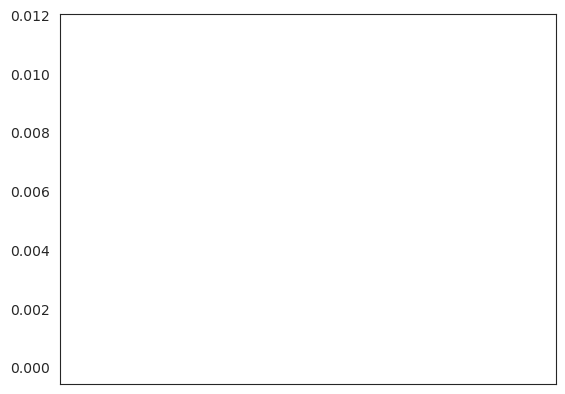

In [11]:
fig, ax = plt.subplots()

ax.set_xlim([date(1500, 1, 1), date(1860, 12, 31)])
ax.plot(dates, n_s)


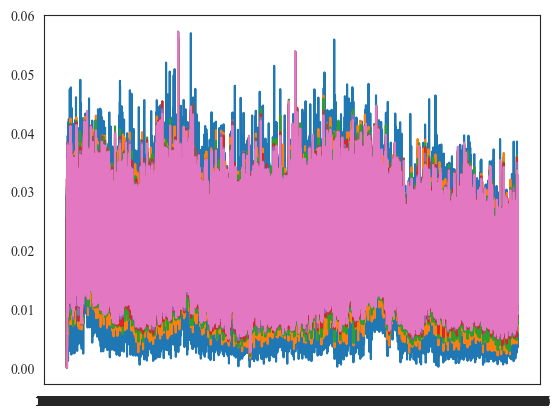

In [27]:
fig,ax = plt.subplots()

for wd in [1,5,10,20,30,40,50]:
    with open(f'../models/230511_prototypes_day/novelty_w{wd}.ndjson') as fin:
	    filename = ndjson.load(fin)
    novelty_signal = filename[0]['novelty_sigma']
    plt.plot(dates, novelty_signal,label=wd)


## Load signal.csv

In [2]:
df = pd.read_csv('../models/230602/signal_clean.csv', index_col=0)
df.shape

(75205, 31)

In [3]:
all_rows = []


for i, r in df.iterrows():
    d_row = dict(r)
    try:
        d_row['clean_month_dt'] = date.fromisoformat(d_row['clean_month'])
        all_rows.append(d_row)
    except ValueError:
        print(d_row)

df = pd.DataFrame(all_rows)
df.shape

(75205, 31)

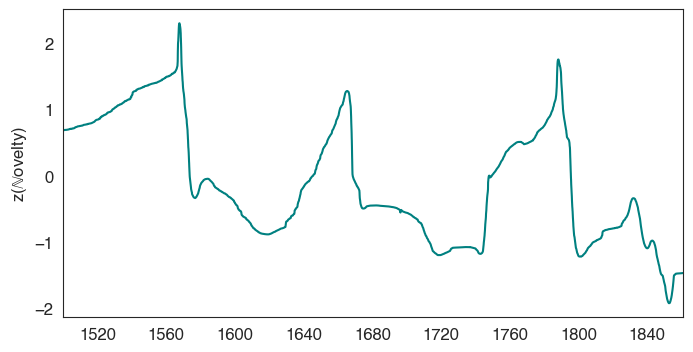

In [44]:
fig, axs = plt.subplots(1, figsize=(8,4))

#axs.plot(df['clean_month_dt'], zscore(df['novelty']), c='darkgrey', alpha=0.7)
axs.plot(df['clean_month_dt'], zscore(df['novelty_afa']), c='teal')
axs.set_xlim([date(1500, 1, 1), date(1860, 12, 31)])
axs.set_xticks
#axs.set_title('Novelty in the $Chronicles$ $Corpus$')
#axs.set_xlabel('year')
axs.set_ylabel('z($\mathbb{N}$ovelty)')

plt.savefig('../images/chronicles-corpus-nov.pdf',bbox_inches='tight')


### Author-corpus signal (average)

In [12]:
size_dict = df['clean_call_nr'].value_counts().to_dict()
dfs = df.groupby(['clean_call_nr', 'century'])[['novelty', 'novelty_sigma', 'transience', 'transience_sigma', 'resonance', 'resonance_sigma', 'novelty_afa', 'transience_afa', 'resonance_afa']].mean()
dfs = dfs.reset_index()

In [36]:
dfs.sort_values('novelty_afa')

,clean_call_nr,century,novelty,novelty_sigma,transience,transience_sigma,resonance,resonance_sigma,novelty_afa,transience_afa,resonance_afa
124,1899_Grou_Haag,19 c.,0.012013,0.005364,0.009917,0.005284,0.000118,0.003592,0.013910,0.013584,0.000269
121,1855_Popp_Jong,19 c.,0.012547,0.005737,0.012284,0.006013,0.000263,0.005875,0.014244,0.013934,0.000299
59,1744_Brus_Anon,18 c.,0.018662,0.006108,0.017935,0.006483,0.000727,0.006296,0.014408,0.014104,0.000304
57,1725_Antw_Anon,18 c.,0.016427,0.005841,0.015843,0.005658,0.000584,0.005749,0.014527,0.014212,0.000315
56,1722_Huiz_Lust,18 c.,0.015335,0.005563,0.014901,0.006157,0.000435,0.005860,0.014595,0.014280,0.000315
...,...,...,...,...,...,...,...,...,...,...,...
4,1567_Amst_Bies,16 c.,0.023036,0.005969,0.022273,0.006693,0.000763,0.006331,0.022144,0.021836,0.000311
7,1571_Gent_Camp,16 c.,0.023739,0.006007,0.023503,0.006611,0.000236,0.006309,0.022219,0.021809,0.000410
20,1587_Weer_Luyt,16 c.,0.023518,0.006490,0.023316,0.007070,0.000195,0.006718,0.022608,0.022242,0.000366
5,1567_Amst_Reae,16 c.,0.030653,0.006384,0.030474,0.006948,0.000180,0.006666,0.023227,0.022890,0.000338


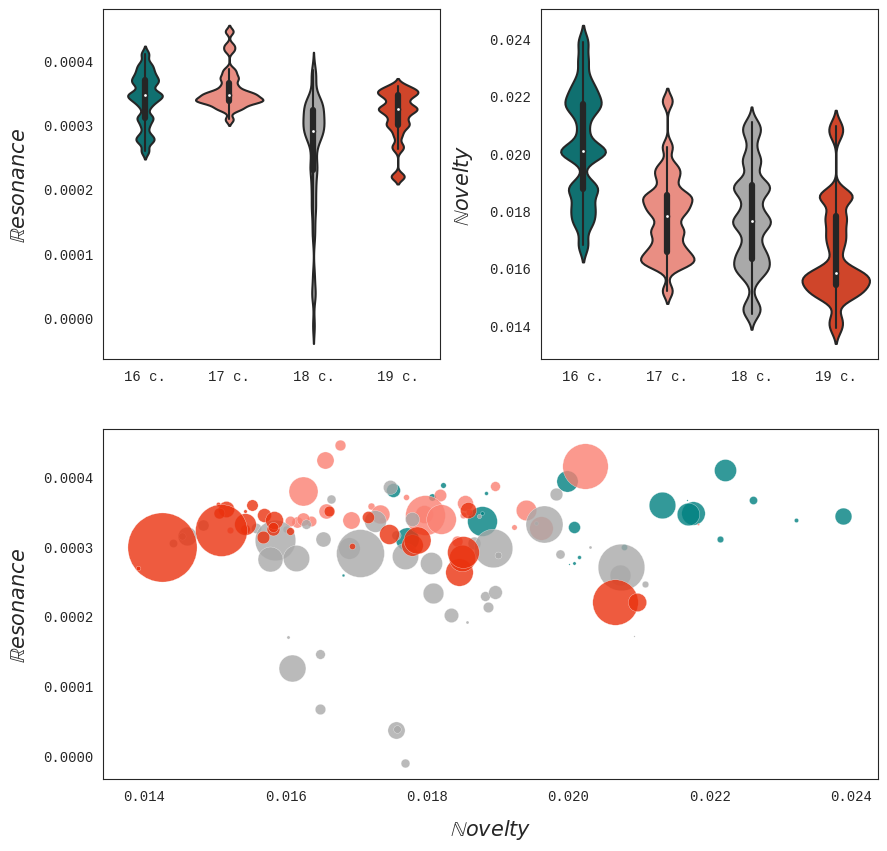

In [13]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3]

#fig.tight_layout()

cols = {"16 c.":"teal","17 c.":"salmon","18 c.":"darkgrey", "19 c.": "#EA320F"}

for i,r in dfs.iterrows():
    ax3.scatter(r['novelty_afa'],r['resonance_afa'],s=size_dict[r['clean_call_nr']]/3,c=cols[r['century']], lw=.25, edgecolor='white', alpha=0.8)
    
ax3.set_xlabel('$\mathbb{N}ovelty$',labelpad=10,fontsize=15)
ax3.set_ylabel('$\mathbb{R}esonance$',labelpad=10,fontsize=15)

my_pal = {"16 c.":"teal","17 c.":"salmon","18 c.":"darkgrey", "19 c.": "#EA320F"}
sns.violinplot(data=dfs,y='novelty_afa',x='century',palette=my_pal,bw=.15,ax=ax2)
ax2.set_ylabel('$\mathbb{N}ovelty$',labelpad=10,fontsize=15)
ax2.set_xlabel('',labelpad=10,fontsize=15)

sns.violinplot(data=dfs,y='resonance_afa',x='century',palette=my_pal,bw=.15,ax=ax1)
ax1.set_ylabel('$\mathbb{R}esonance$',labelpad=10,fontsize=15)
ax1.set_xlabel('',labelpad=10,fontsize=15)


plt.subplots_adjust(wspace=.3)
#plt.savefig('../images/actor-level-nov-res-chron.pdf',bbox_inches='tight')
plt.show()

### Author-corpus signal (over time)

In [53]:
selected = []

for k, v in size_dict.items():
    if v > 1200:
        selected.append(k)

selected.sort()

In [54]:
selected

['1580_Antw_Wese',
 '1668_Gent_Bill',
 '1684_Brug_Inbo',
 '1697_Leeu_Vitr',
 '1699_Bosc_Anon',
 '1745_Kort_Putt',
 '1772_Amst_Bikk',
 '1792_Brie_Klui',
 '1796_Purm_Louw',
 '1800_Brug_Wall',
 '1807_Leuv_Pelc',
 '1846_Antw_Coni',
 '1855_Popp_Jong',
 '1856_Wird_Hell']

In [61]:
range_date = [
              [date(1568, 1, 1), date(1580, 12, 31)], 
              [date(1658, 1, 1), date(1668, 8, 31)],
              [date(1645, 1, 1), date(1684, 12, 31)],
              [date(1696, 1, 1), date(1697, 10, 31)], 
              [date(1500, 1, 1), date(1699, 12, 31)],
              [date(1650, 1, 1), date(1745, 12, 31)], 
              [date(1732, 1, 1), date(1772, 12, 31)],
              [date(1570, 1, 1), date(1791, 12, 31)], 
              [date(1745, 1, 1), date(1796, 12, 31)], 
              [date(1778, 1, 1), date(1800, 12, 31)], 
              [date(1775, 1, 1), date(1787, 12, 31)],
              [date(1800, 1, 1), date(1846, 12, 31)], 
              [date(1825, 1, 1), date(1856, 12, 31)],
              [date(1825, 1, 1), date(1856, 12, 31)]]

/var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/ipykernel_3740/4017434226.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel['novelty_z'] = zscore(sel['novelty'])
/var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/ipykernel_3740/4017434226.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel['novelty_afa_z'] = zscore(sel['novelty_afa'])
/var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/ipykernel_3740/4017434226.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

IndexError: list index out of range

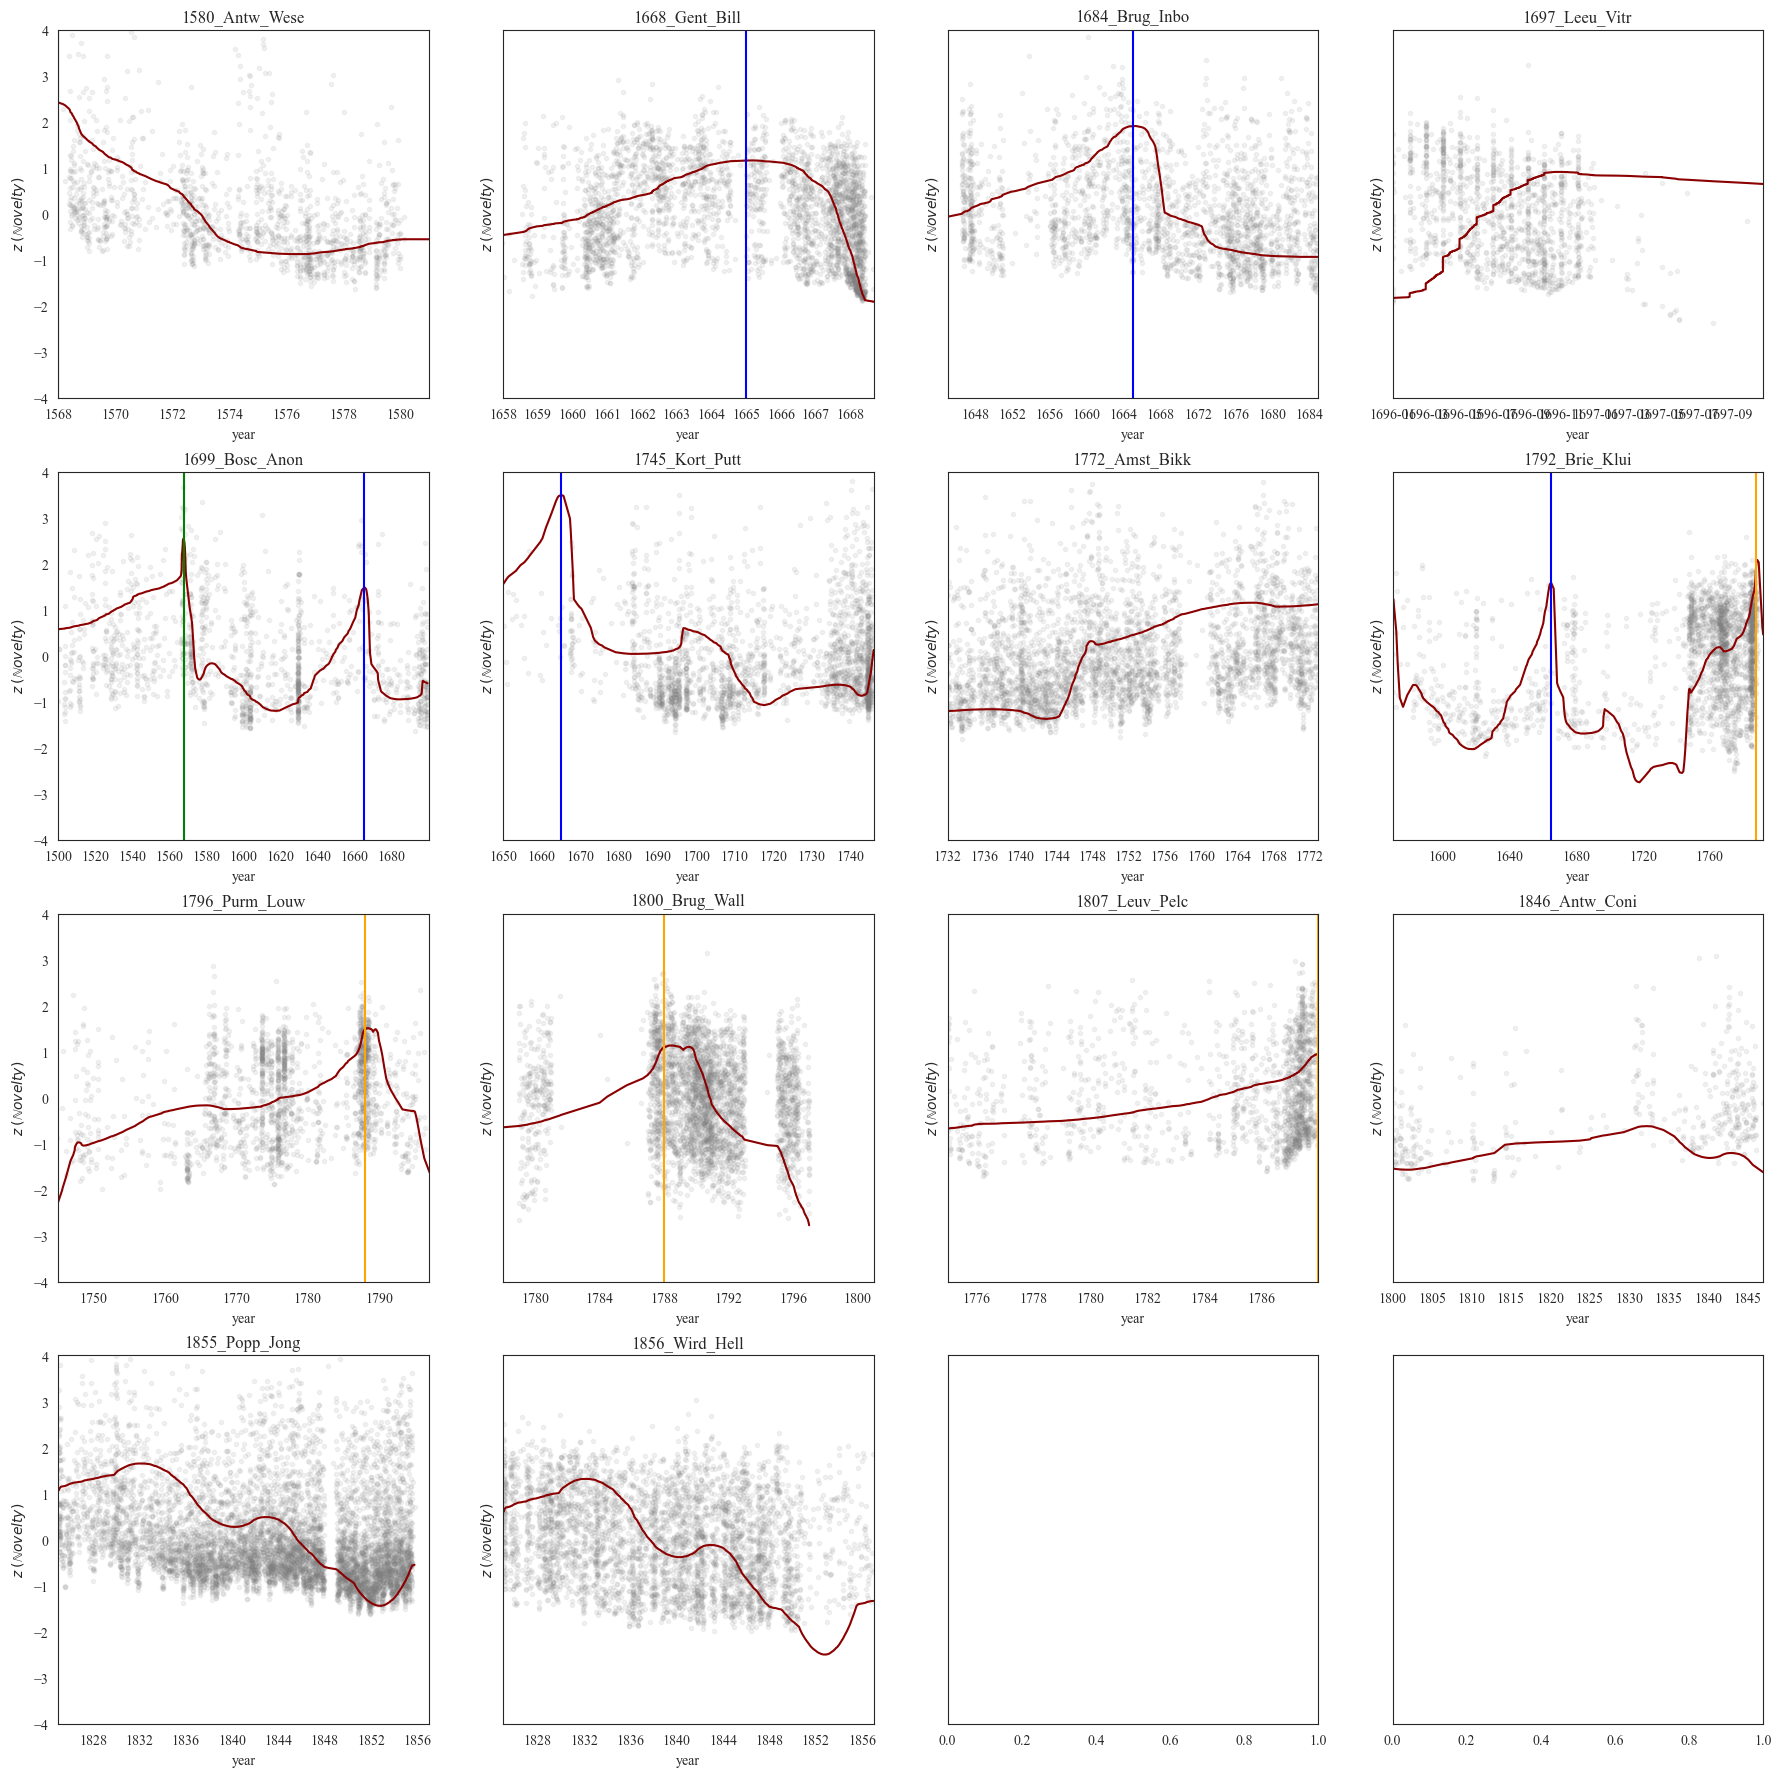

In [62]:
fig, axes = plt.subplots(4,4, figsize=(22,22), sharey=True)
axes = axes.flatten()

for i in range(16):
    sel = df[df['clean_call_nr'] == selected[i]]
    # zscore
    sel['novelty_z'] = zscore(sel['novelty'])
    sel['novelty_afa_z'] = zscore(sel['novelty_afa'])
    sel['novelty_sigma_z'] = zscore(sel['novelty_sigma'])
        
    axes[i].plot(sel['clean_month_dt'], sel['novelty_z'], '.', color='grey', alpha=0.1)
    axes[i].plot(sel['clean_month_dt'], sel['novelty_afa_z'], '-', color='darkred')
    axes[i].axvline(x=(date(1568, 1, 1)), color='green')
    axes[i].axvline(x=(date(1665, 1, 1)), color='blue')
    axes[i].axvline(x=(date(1788, 1, 1)), color='orange')
    axes[i].set_title(selected[i])
    axes[i].set_xlabel('year')
    axes[i].set_ylabel('$z$ $(\mathbb{N}ovelty)$')
    axes[i].set_ylim(-4, 4)
    axes[i].set_xlim(range_date[i])
    #axes[i].set_xlim([date(1500, 1, 1), date(1856, 12, 31)])

#plt.savefig('../images/chroniclers-novelty.jpg', bbox_inches='tight', dpi=300)


## Author signal

In [59]:
df2 = pd.read_csv('../models/230602/chronicles/1855_Popp_Jong_signal.csv', index_col=0)
all_rows = []

for i, r in df2.iterrows():
    d_row = dict(r)
    try:
        d_row['clean_month_dt'] = date.fromisoformat(d_row['clean_month'])
        all_rows.append(d_row)
    except ValueError:
        print(d_row)

df2 = pd.DataFrame(all_rows)

{'text': "31 . West en Z.Westelijk, geen wind. Een daauw of mist zweeft over den grond, wolkens, N.Westelijk. De lucht is als een voorjaarsdag soms. Wat weer zal het zijn? Volle maan nanacht, de 5de maanwisseling dezen maand, dat zelden voorkomt. Boter 26½, 27¼, 25, 27½, 32. Kaas 12 à 14 à 18. Door de langdurige droogte komt graskrapte, voornamelijk op de kleistreken, en daardoor prijsvermindering in het vee. De vlugge negotie is thans over, doch kan spoedig weder herstellen bij een schoone regen, want hier en elders hebben meer voornamelijk de blaauwgraslanden overvloed van hooi (wij nooit meer gehad, wij hebben buitenland, dat de bunder 8 à 9 voeder geeft; 't is zomerpolder, het beste ja! voor 2 koejen). Maar de weide wordt hier ook veel schraalder, minder melk, geringer boter, wier prijzen steigeren.", 'call_nr': '1855_Popp_Jong', 'id': 62177, 'clean_date': '1852-06-31', 'date_uncertainty': 'unambiguous day', 'clean_month': '1852-06-31', 'len_text': 804, 'n_tokens': 133, 'call_nr_cl

Text(0, 0.5, '$z$ $(\\mathbb{R}esonance)$')

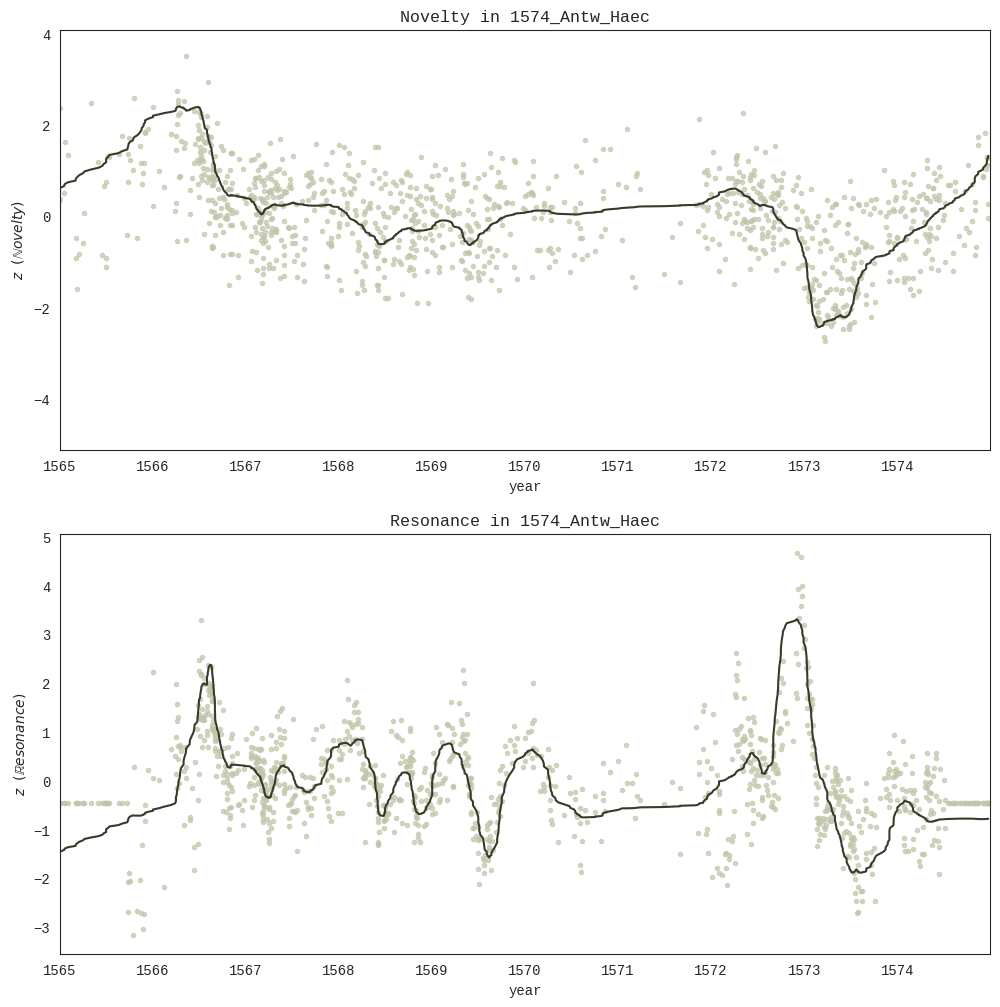

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(12,12))

chr = '1796_Purm_Louw'

axs[0].plot(df2['clean_month_dt'], zscore(df2['novelty']), '.', c='#C2C5AA', alpha=0.7)
axs[0].plot(df2['clean_month_dt'], zscore(df2['novelty_afa']), c='#333D29')
axs[0].set_xlim([date(1565, 1, 1), date(1574, 12, 31)])
axs[0].set_title(f'Novelty in {chr}')
axs[0].set_xlabel('year')
axs[0].set_ylabel('$z$ $(\mathbb{N}ovelty)$')

axs[1].plot(df2['clean_month_dt'], zscore(df2['resonance']), '.', c='#C2C5AA', alpha=0.7)
axs[1].plot(df2['clean_month_dt'], zscore(df2['resonance_afa']), c='#333D29')
axs[1].set_xlim([date(1565, 1, 1), date(1574, 12, 31)])
axs[1].set_title('Resonance in 1574_Antw_Haec')
axs[1].set_xlabel('year')
axs[1].set_ylabel('$z$ $(\mathbb{R}esonance)$')

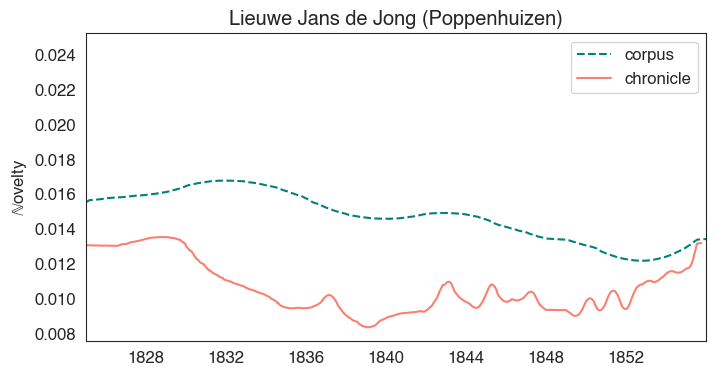

In [60]:
fig, axs = plt.subplots(1, figsize=(8,4))

chr = '1855_Popp_Jong'

#axs.plot(df2['clean_month_dt'], zscore(df2['novelty']), '.', c='darkgrey', alpha=0.4)
axs.plot(df['clean_month_dt'], df['novelty_afa'], linestyle='dashed', c='teal')
axs.plot(df2['clean_month_dt'], df2['novelty_afa'], c='salmon')
axs.set_xlim([date(1825, 1, 1), date(1855, 12, 31)])
axs.legend(['corpus', 'chronicle'])
axs.set_title('Lieuwe Jans de Jong (Poppenhuizen)')
#axs.set_xlabel('year')
axs.set_ylabel('$\mathbb{N}$ovelty')
plt.savefig(f'../images/{chr}-nov-corpus-nov.pdf', bbox_inches='tight')

Text(0, 0.5, '$z$ $(\\mathbb{R}esonance)$')

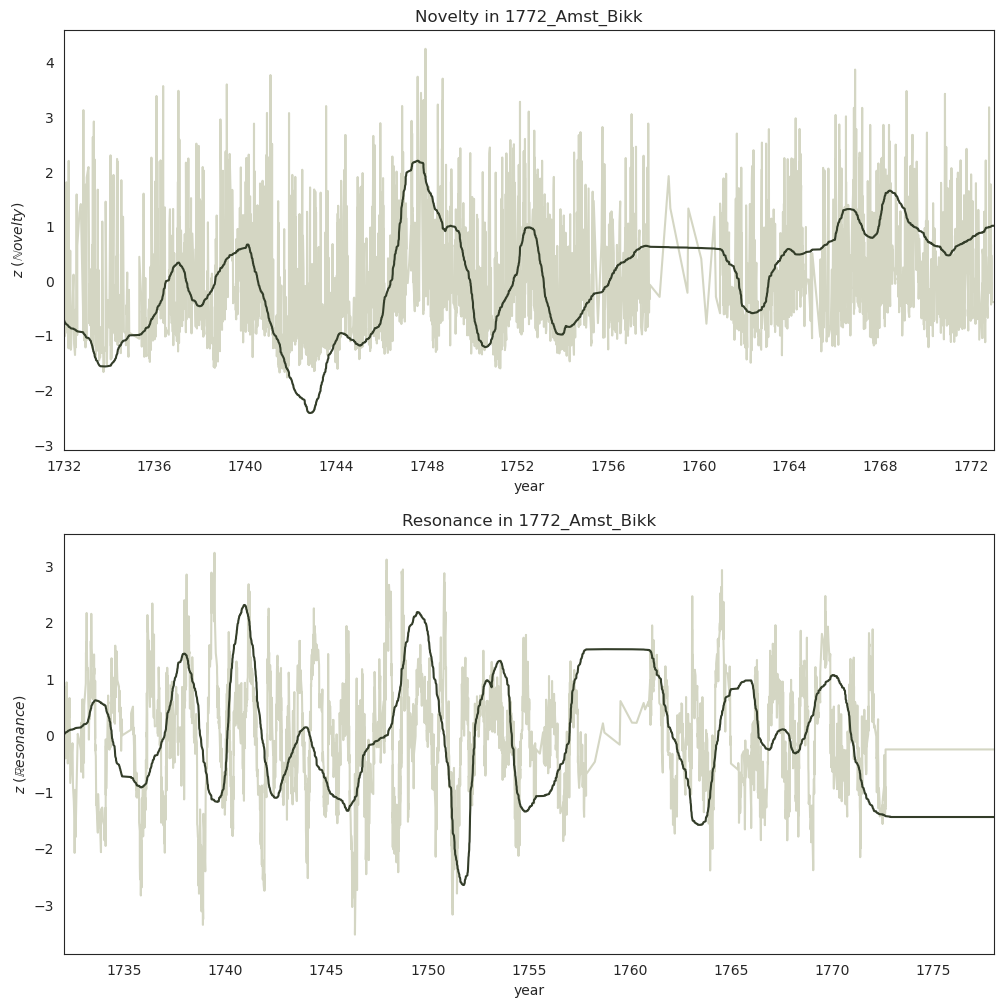

In [98]:
df = pd.DataFrame(all_rows)
df.shape
fig, axs = plt.subplots(2, 1, figsize=(12,12))

axs[0].plot(df['clean_month_dt'], zscore(df['novelty']), c='#C2C5AA', alpha=0.7)
axs[0].plot(df['clean_month_dt'], zscore(df['novelty_afa']), c='#333D29')
axs[0].set_xlim([date(1732, 1, 1), date(1772, 12, 31)])
axs[0].set_title('Novelty in 1772_Amst_Bikk')
axs[0].set_xlabel('year')
axs[0].set_ylabel('$z$ $(\mathbb{N}ovelty)$')

axs[1].plot(df['clean_month_dt'], zscore(df['resonance']), c='#C2C5AA', alpha=0.7)
axs[1].plot(df['clean_month_dt'], zscore(df['resonance_afa']), c='#333D29')
axs[1].set_xlim([date(1732, 1, 1), date(1777, 12, 31)])
axs[1].set_title('Resonance in 1772_Amst_Bikk')
axs[1].set_xlabel('year')
axs[1].set_ylabel('$z$ $(\mathbb{R}esonance)$')